In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Implemented Artificial Neural Network on MNist dataset with an
accuracy of 98%


In [ ]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.#minist dataset contains of images of numbers from 0-9.Each image is of 28x28 resolution and each cell is of a pixel of the image.We need to classify the pixel data into any one of the images of numbers

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape#60,000 images each of 28x28 array and each cell is a pixel of image

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:5]#first image is a 5,2nd is a 0 and so on....

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#input layer where we flatten the inputs
    tf.keras.layers.Dense(128,activation='relu'),#hidden layer with 128 neurons
    tf.keras.layers.Dropout(0.2),#20% of the neurons in the hidden layer will be switched off
    tf.keras.layers.Dense(10)#output layer with 10 categories as numbers are from [0,9]
])

In [ ]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2967 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1455 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1093 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0747 - accuracy: 0.9766


In [ ]:
model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9785


[0.07458296418190002, 0.9785000085830688]

In [ ]:
test_image=x_test[0]

In [ ]:
logits=model.predict(np.expand_dims(test_image,axis=0))

1/1 [==============================] - 0s 60ms/step


In [ ]:
np.expand_dims(test_image,axis=0).shape

(1, 28, 28)

In [ ]:
probabilities=tf.nn.softmax(logits).numpy()#softmax is an activation function
probabilities

array([[5.8914736e-08, 3.4065624e-09, 2.5905324e-06, 3.5163987e-04,
        3.8137500e-13, 1.4113893e-07, 2.0256064e-13, 9.9964178e-01,
        8.4515825e-08, 3.7325728e-06]], dtype=float32)

In [ ]:
predicted_class=np.argmax(probabilities)
predicted_class

7

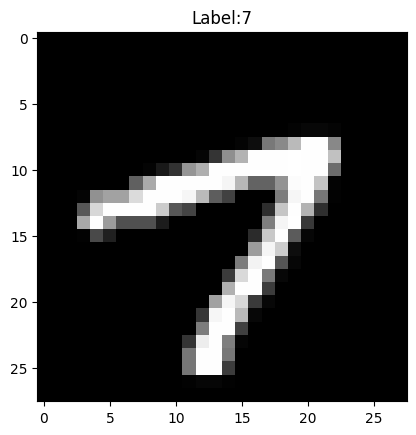

In [ ]:
plt.imshow(x_train[101],cmap='gray')#gray colormap to show the image in grayscale
plt.title(f'Label:{y_train[101]}')
plt.show()